In [1]:
from dataloader import GalaxyZooDatasetTrainV2
from mynn import MyCNN

import torch.nn as nn
import torch

import matplotlib.pyplot as plt

import time
from math import ceil

## Data loading

In [2]:
data_csv = "../data/training_solutions_rev1/training_solutions_rev1.csv"
root_dir = "../data/images_training_rev1"
my_dataset_train = GalaxyZooDatasetTrainV2(csv_file=data_csv, root_dir=root_dir, first_elem=0, last_elem=0.7)
my_dataset_validation = GalaxyZooDatasetTrainV2(csv_file=data_csv, root_dir=root_dir, first_elem=0.7, last_elem=1)
train_to_validation_ratio = ceil(len(my_dataset_train)/len(my_dataset_validation))

## Model creation or loading

In [3]:
model_path = None

In [4]:
# model_path = "../models/model_test1.pt"

In [5]:
# save_model = True
save_model = False
save_model_name = ''
if save_model:
    save_model_name = '../models/model_test3.pt'

In [6]:
if model_path:
    model = torch.load(model_path)
else:
    model = MyCNN()

In [7]:
class RMSELoss(torch.nn.Module):
    def __init__(self):
        super(RMSELoss,self).__init__()

    def forward(self,x,y):
        criterion = nn.MSELoss()
        eps = 1e-6
        loss = torch.sqrt(criterion(x, y) + eps)
        return loss

In [8]:
import torch.optim as optim

criterion = RMSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## Display function

In [9]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(20,10), title='', xlabel='epoch'):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [10]:
import numpy as np

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

## Training

In [11]:
losses_train = []
losses_validation = []

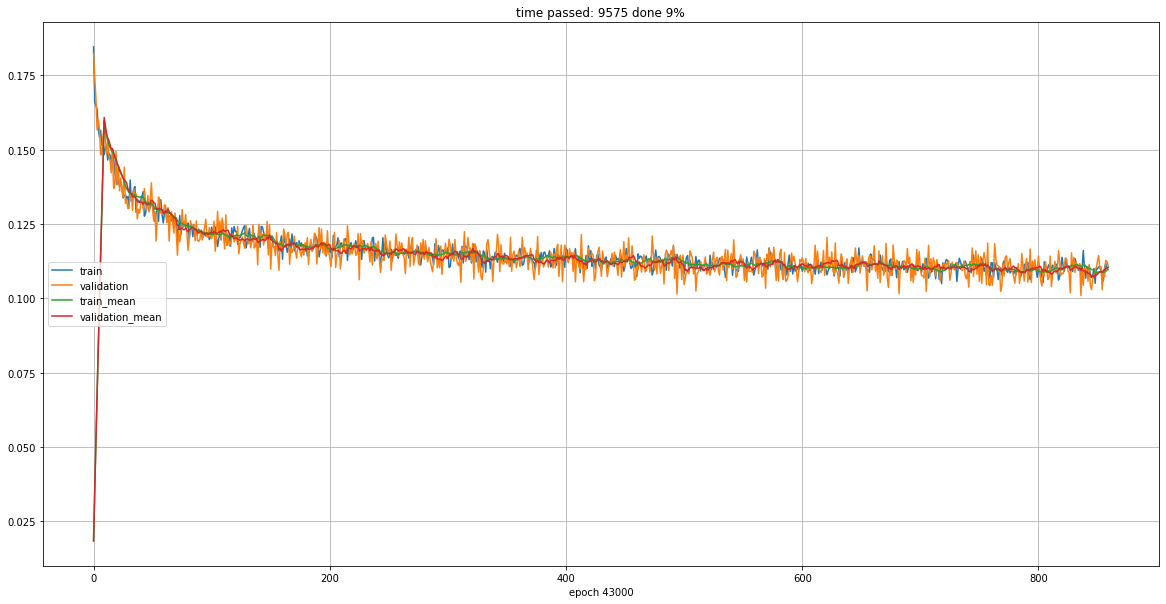

/home/sotnyk/sotnyk/UCU/III_year/ML/project/ml_proj/lib/python3.6/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([37])) that is different to the input size (torch.Size([1, 37])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Finished Training
9578.81383895874


In [12]:
data_to_plot = {}

t = time.time()
print_interval = 500
epoch_number = 10
try:
    for epoch in range(epoch_number):  # loop over the dataset multiple times

        running_loss_train = 0.0
        running_loss_validation = 0.0
        for i in range(len(my_dataset_train)):
#         for i in range(7000):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = my_dataset_train[i]

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss_train += loss.item()
            if i % train_to_validation_ratio == 0:
                inputs, labels = my_dataset_validation[int(i/train_to_validation_ratio)]
                running_loss_validation += criterion(model(inputs), labels).item()*train_to_validation_ratio
                
                
            if i % print_interval == print_interval - 1:    # print every print_interval mini-batches
#                 print('[%d, %5d] loss train: %.3f' %
#                       (epoch + 1, i + 1, running_loss_train / print_interval))
#                 print('[%d, %5d] loss validation: %.3f' %
#                       (epoch + 1, i + 1, running_loss_validation / print_interval))
                
#                 print("i: ", i, "time: ", time.time() - t)
                losses_train.append(running_loss_train / print_interval)
                losses_validation.append(running_loss_validation / print_interval)
                running_loss_validation = 0.0
                running_loss_train = 0.0
                data_to_plot['train'] = losses_train
                data_to_plot['validation'] = losses_validation
                data_to_plot['train_mean'] = moving_average([0.20 for i in range(9)] + losses_train, 10)
                data_to_plot['validation_mean'] = moving_average([0.20 for i in range(9)] + losses_validation, 10)
                progress_info = 'time passed: ' + str(int(time.time()-t)) + ' done ' + str(int(i*100/(len(my_dataset_train)))) + '% epoch ' + str(epoch) 
                live_plot(data_to_plot, title=progress_info, xlabel='count '+str(i + 1))
                
                


    print('Finished Training')

except KeyboardInterrupt:
    print(i)
    
finally:
    print(time.time()-t)
   

    
    # Model class must be defined somewhere
# model = torch.load(PATH)
# model.eval()




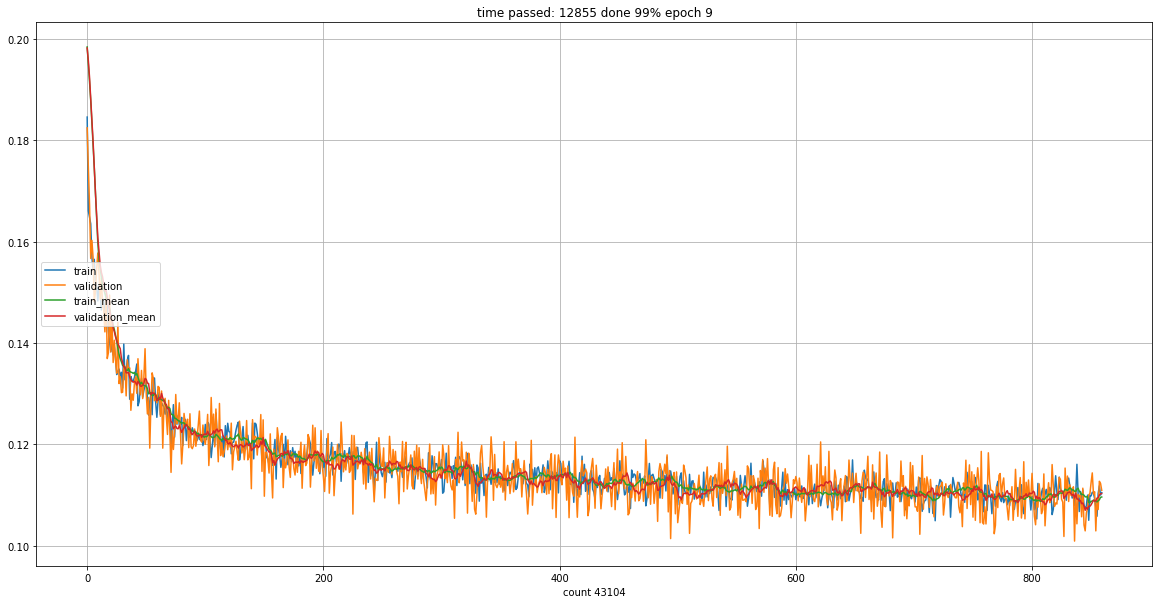

In [17]:
data_to_plot = {}
data_to_plot['train'] = losses_train
data_to_plot['validation'] = losses_validation
data_to_plot['train_mean'] = moving_average([0.20 for i in range(9)] + losses_train, 10)
data_to_plot['validation_mean'] = moving_average([0.20 for i in range(9)] + losses_validation, 10)
progress_info = 'time passed: ' + str(int(time.time()-t)) + ' done ' + str(int(i*100/(len(my_dataset_train)))) + '% epoch ' + str(epoch) 
live_plot(data_to_plot, title=progress_info, xlabel='count '+str(i + 1))

## Model saving

In [13]:
raise AssertionError

AssertionError: 

In [16]:
torch.save(model, "../models/model_new_dataset.pt")